In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro


### p130

In [9]:
df = pd.DataFrame({'sample': [74.5, 81.2, 73.8, 82.0, 76.3, 75.7, 80.2, 72.6, 77.9, 82.8]})

# 정규성 검정
shapiro(df)

# 1-sample t-test
t_result = stats.ttest_1samp(df, 76.7)

## 1-sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

## 1-sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("통계량 : {}".format(t))
print("p-value : {}".format(p))

# p 값이 0.41 이므로 p > 0.05 이므로 귀무가설을 채택
# 즉 개선활동이 고객 만족도 변화를 향상시켰다고 볼 수 없다. 

1-Sample t-test
통계량 : [0.864]
p-value : [0.41]


### p131

In [78]:
df = pd.DataFrame({'sample': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})

# 정규성 검정
shapiro(df)
# p > 0.05 이므로 귀무가설 채택
# 정규성이 있다

ShapiroResult(statistic=0.8473217487335205, pvalue=0.0539751797914505)

In [79]:
# 1-sample t-test
t_result = stats.ttest_1samp(df, 78.0)

## 1-sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

## 1-sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("통계량 : {}".format(t))
print("p-value : {}".format(p))

#가설 수립 및 유의수준 설정 - 귀무가설 : 평균이 78이다  대립가설 : 평균이 78이 아니다  유의수준 : 0.05
# 가설 검정 수행 - 통계량 3.379 / p-value : 0.008
# 검정 결과 판단 - p 값이 0.008 이므로 p < 0.05 이므로 대립가설을 채택, 평균이 78이 아니다.
# 즉, 개선활동이 고객 만족도 변화를 향상시켰다고 볼 수 있습니다. 

1-Sample t-test
통계량 : [3.379]
p-value : [0.008]


### p137

In [11]:
df1 = pd.DataFrame({'sample': [6, 5, 5, 4, 6, 7, 6, 4, 5, 6, 4, 5, 5, 6, 4, 8, 6, 5, 6, 7]})
df2 = pd.DataFrame({'sample': [7, 5, 7, 8, 7, 8, 8, 5, 7, 6, 5, 5, 6, 6, 5, 7, 9, 7, 7, 8]})

# 정규성 검정
shapiro(df1)  # 정규성이 있다

ShapiroResult(statistic=0.9094840288162231, pvalue=0.06230909377336502)

In [12]:
# 정규성 검정
shapiro(df2)  # 정규성이 없다.

ShapiroResult(statistic=0.8978105783462524, pvalue=0.03752673789858818)

In [13]:
# 등분산성 검정
stats.levene(df1['sample'],df2['sample']) # 등분산성이 있다.
# stats.bartlett(df1['sample'], df2['sample'])  위랑 같은 코드이다.

# p > 0.05
# 분산이 같다

LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)

In [80]:
t_result = stats.ttest_ind(df1, df2)

t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

## 2-sample t-test의 t값 p값 출력
print("2-Sample t-test")
print("t : {}".format(t))
print("p : {}".format(p))

# p < 0.05 이므로 대립가설 채택 
# 즉 고객간에 고객만족도의 차이가 있다. 
# t 값이 마이너스가 나왔기 떄문에 b 고객의 만족도가 더 크다 

2-Sample t-test
t : 36.532
p : 0.0


### p139

In [15]:
df1 = pd.DataFrame({'sample': [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df2 = pd.DataFrame({'sample': [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})

# 정규성 검정
shapiro(df1)  # 정규성이 있다  (p > 0.05)

ShapiroResult(statistic=0.8425756096839905, pvalue=0.08004552870988846)

In [16]:
# 정규성 검정
shapiro(df2)  # 정규성이 없다. (p < 0.05)

ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)

In [17]:
# 등분산성 검정
stats.levene(df1['sample'],df2['sample'])
# p > 0.05 등분산성이 있다.


LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)

In [18]:
t_result = stats.ttest_ind(df1, df2)

t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

## 2-sample t-test의 t값 p값 출력
print("2-Sample t-test")
print("t : {}".format(t))
print("p : {}".format(p))

# 귀무가설 : A 공급자와 B공급자간에 두께 측정의 차이가 있다
# 대립가설 : 
# p > 0.05 이므로 귀무가설 채택 
# 공급자간의 두께 차이가 없다
# t 값이 양수 이므로 A공급자의 평균이 더 크다 

2-Sample t-test
t : [1.7]
p : [0.111]


### p140

In [23]:
df1 = pd.DataFrame({'before': [720,589, 780, 648, 720, 589, 780, 648, 780, 648 ]})
df2 = pd.DataFrame({'after': [810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

t_result = stats.ttest_rel(df1, df2)

t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

# paired t-test의 t값 p값 출력
print("Paired t-test")
print("t : {}".format(t))
print("p : {}".format(p))

# 귀무가설 : 평균의 차이가 없다.     대립가설 : 평균의 차이가 있다.
# p 값이 0.000 학원 수강 전후의 점수는 차이가 있다고 할 수 있다. 
# 대립가설 채택
# t 값이 음수이므로 학원가기후가 성적이 좋아졌다고 할 수 있다 

Paired t-test
t : [-5.324]
p : [0.]


### p142

In [24]:
df1 = pd.DataFrame({'before': [720,589, 780, 648, 720, 589, 780, 648, 780, 648 ]})
df2 = pd.DataFrame({'after': [710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})

t_result = stats.ttest_rel(df1, df2)

t, p = t_result.statistic.round(3),t_result.pvalue.round(3)

# paired t-test의 t값 p값 출력
print("Paired t-test")
print("t : {}".format(t))
print("p : {}".format(p))



Paired t-test
t : [-2.266]
p : [0.05]


### p146

In [ ]:
count = 15
n_obs = 100
value = 0.1


stat.pval = proportions_ztest(count, n_obs, value)

print("1 Proportions test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))

# p >0.05 이므로 귀무가설 채택
# a제품에 대해 품질개선 결과 기존 대비 사용비율과 차이가 없다.


In [33]:
count = 150
n_obs = 1000
value = 0.1


stat, pval = proportions_ztest(count, n_obs, value)

print("1 Proportions test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))

# p = 0.000 이므로 대립가설 채택
# a제품에 대해 품질개선 결과 기존 대비 사용비율과 차이가 있다.
# 통계량 z 가 유의 수준에 있다는 뜻이다. = 신뢰구간에서 벗어난다
# 고객 만족도가 0.1 보다 좋아진 것이다. 


1 Proportions test
z : 4.428
p : 0.000


### p 148

In [37]:
count = 40
n_obs = 100
value = 0.5


stat,pval = proportions_ztest(count, n_obs, value)

print("1 Proportions test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))

# p >0.05 이므로 귀무가설 채택
# a제품에 대해 품질개선 결과 기존 대비 사용비율과 차이가 없다.


1 Proportions test
z : -2.041
p : 0.041


### p149

In [35]:
count = np.array([4, 1])
nobs = np.array([1000, 1200])

stat, pval = proportions_ztest(count, nobs)

print("2 Proportions test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))
# p > 0.05 귀무가설 채택
# 즉 두 공장의 불량률은 차이가 없다.

2 Proportions test
z : 1.553
p : 0.120


In [36]:
count = np.array([40, 10])
nobs = np.array([10000, 12000])

stat, pval = proportions_ztest(count, nobs)

print("2 Proportions test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval)) 

# p = 0.000 대립가설 채택
# 즉 두 공장의 불량률은 차이가 있다.
# 통계량이 양수 즉, 공장 2가 불량률이 더 크다?

2 Proportions test
z : 4.911
p : 0.000


### p151

In [81]:
count = np.array([14, 5])
nobs = np.array([1200, 1200])

stat, pval = proportions_ztest(count, nobs)

print("2 Proportions test")
print("z : {0:0.3f}".format(stat))
print("p : {0:0.3f}".format(pval))


# 가설 수립 및 유의수준 설정 - 귀무가설 : 두 공장의 불량률은 차이가 없다. / 대립가설 : 두 공장의 불량률은 차이가 있다.
# 가설 검정 수행 -통계량 2.703 / p-value : 0.038
# 검정결과 판단 - p < 0.05 이므로 대립가설 채택, 두 공장의 불량률은 차이가 있다.
# 즉, 두 공정의 불량률이 같다고 할 수 없다. 통계량이 양수 값이므로 A공장의 불량률이 더 높다고 할 수 있다.

2 Proportions test
z : 2.073
p : 0.038


### p157

In [82]:
df = pd.DataFrame({'HSG' : [270, 260, 236, 234], 'SS' : [228, 285, 225, 262], 'SPA' : [227, 284, 231, 208]})

chi, pval, dof, expected = stats.chi2_contingency(df.T)
    
print("chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree of freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

# p > 0.05 귀무가설 채택
# 제품간에 이미지의 차이가 있다고 볼 수 없다. 

chi-square test
chisq : 11.187
p : 0.083
degree of freedom : 6
expected value : 
[[245.763 281.017 234.576 238.644]
 [245.763 281.017 234.576 238.644]
 [233.475 266.966 222.847 226.712]]


### p159

In [83]:
df = pd.DataFrame({'A': [18,  1, 8, 7, 10, 9, 10], 'B': [8, 2, 14, 5, 5, 9, 4],
                   'C': [4, 1, 3, 4, 9, 5, 4],'D': [4, 1, 2, 3, 2, 7, 3],
                   'E': [3, 1, 3, 1, 1, 1, 1], 'F': [3, 25, 8, 10, 2, 1, 7]})

chi, pval, dof, expected = stats.chi2_contingency(df.T)
    
print("chi-square test")
print("chisq : {0:0.3f}".format(chi))
print("p : {0:0.3f}".format(pval))
print("degree pf freedom : {}".format(dof))
print("expected value : \n{}".format(expected.round(3)))

# p =0.000 대립가설 채택
# 제품간에 이미지의 차이가 있다고 볼 수 있다. 

chi-square test
chisq : 98.274
p : 0.000
degree pf freedom : 30
expected value : 
[[11.004  8.528 10.454  8.253  7.978  8.803  7.978]
 [ 8.21   6.362  7.799  6.157  5.952  6.568  5.952]
 [ 5.24   4.061  4.978  3.93   3.799  4.192  3.799]
 [ 3.843  2.978  3.651  2.882  2.786  3.074  2.786]
 [ 1.921  1.489  1.825  1.441  1.393  1.537  1.393]
 [ 9.782  7.581  9.293  7.336  7.092  7.825  7.092]]


### p165

one-way
F 통계량 : 4.263
p-value : 0.025


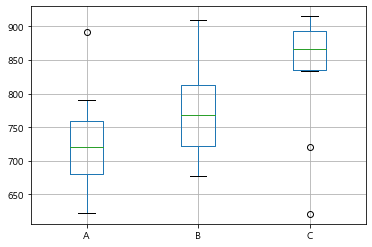

In [84]:
df = pd.DataFrame({'A': [892, 623, 721, 678, 723, 790, 720, 670, 690, 771],
                   'B': [721, 821, 910, 678, 723, 790, 711, 790, 745, 891],
                   'C': [621, 915, 888, 721, 894, 834, 841, 912, 845, 889]})
df.boxplot(['A', 'B', 'C'])
f_result = stats.f_oneway(df['A'],df['B'],df['C'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("one-way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

# 대립가설 채택 
# 귀무가설 : 그룹간 평균이 같다.   대립가설 : 그룹간의 평균이 다르다
# 그룹간의 평균차이가 있다고 할 수 있다. 

### p167

one-way
F 통계량 : 4.172
p-value : 0.019


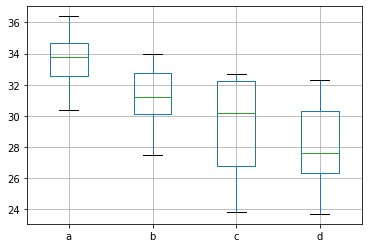

In [34]:
df = pd.DataFrame({'a': [32.2, 30.4, 33.6, 36.4, 33.9, 34.9],
                   'b': [33.1, 29.9, 31.7,27.5, 34, 30.7 ],
                   'c' : [32.6, 32.7, 29.3, 25.9, 31.1, 23.8],
                   'd' : [26.7, 28.5, 30.9, 26.2, 32.3, 23.7]})

df.boxplot(['a', 'b', 'c', 'd'])
f_result = stats.f_oneway(df['a'],df['b'],df['c'],df['d'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("one-way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

one-way
F 통계량 : 9.654
p-value : 0.005


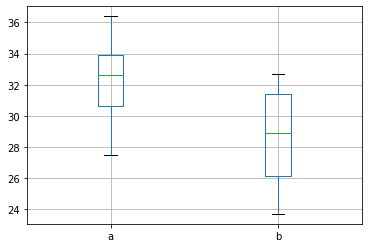

In [35]:
df = pd.DataFrame({'a': [32.2, 30.4, 33.6, 36.4, 33.9, 34.9,33.1, 29.9, 31.7,27.5, 34, 30.7],
                   'b' : [32.6, 32.7, 29.3, 25.9, 31.1, 23.8,26.7, 28.5, 30.9, 26.2, 32.3, 23.7]})

df.boxplot(['a', 'b'])
f_result = stats.f_oneway(df['a'],df['b'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("one-way")
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

### p172

In [30]:
df1 = [1, 2, 3, 4, 4, 5, 6, 6, 7, 8]
df2 = [23, 29, 49, 64, 74, 87, 96, 97, 109, 119]

corr,pval = stats.pearsonr(df1, df2)

print("Correlation Analtsis")
print("corr : {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

# 상관계수가 0.989로 1에 가깝다 = 강한 상관성
# 양의 상관 관계가 있다
# p < 0.05 대립가설 채택
# 귀무가설 : 상관관계가 0이다
# 대립가설 : 상관관계가 0이 아니다 
# 즉 상관관계가 0이 아니다. 의미가 있다.

Correlation Analtsis
corr : 0.989
p-value : 0.000


In [31]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 
      36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16,14, 16, 18, 13, 15, 17, 14, 16, 20, 21 ]

corr,pval = stats.pearsonr(df1, df2)

print("Correlation Analtsis")
print("corr : {0:0.3f}".format(corr))
print("p-value : {0:0.3f}".format(pval))

# 상관계수가 -0.723로 -1에 가깝다 = 강한 음의 상관성
# 음의 상관 관계가 있다
# p < 0.05 대립가설 채택
# 귀무가설 : 상관관계가 0이다
# 대립가설 : 상관관계가 0이 아니다 
# 즉 상관관계가 0이 아니다. 의미가 있다. 

Correlation Analtsis
corr : -0.723
p-value : 0.000


### p198

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
import matplotlib


matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus=False)


In [86]:
# 데이터 구성하기
df_raw = pd.read_csv('C:/Users/USER/Desktop/포스코 청년 아카데미_B4_김민경/통계이해/통계이해자료/부품수리시간.csv')
df_raw.head()


,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [87]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

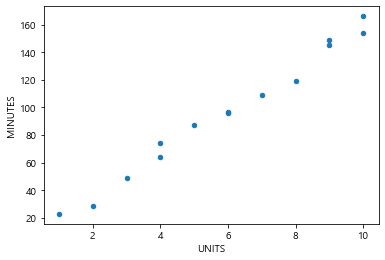

In [88]:
# 산점도 분석  (선형적 관계이다 UNITS가 증가 함에 따라 MIMUTES도 증가한다.)
df_raw.plot.scatter(x = 'UNITS', y = 'MINUTES')

In [89]:
# 상관관계 분석
df_raw.corr(method = 'pearson').round(3)

# 상관관계가 0,994 이므로 매우 높은 선형관계가 있음을 확인할 수 있다 

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [90]:
# 선형회귀분석

reg_model = smf.ols(formula = 'MINUTES ~ UNITS', data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

#R-squared 가 0.987로 매우높다. 설명력이 좋다는 의미이다.

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           8.92e-13
Time:                        21:29:17   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


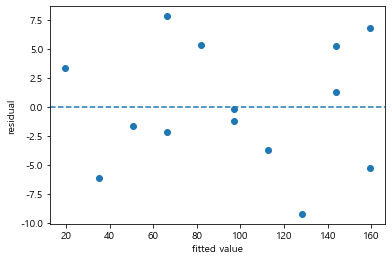

In [91]:
# 잔차의 등분산성 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '--')

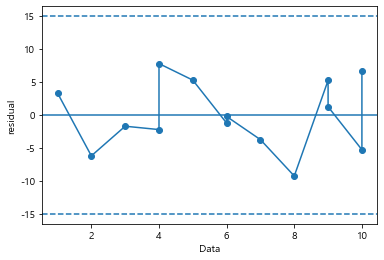

In [62]:
# 잔차의 독립성
plt.plot(df_raw['UNITS'], reg_result.resid, marker = 'o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y = 0, linestyle = '-')
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = '--')
plt.axhline(y = -3* np.std(reg_result.resid), linestyle = '--')

C:\Users\USER\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.7464482182734666, pvalue=0.6885109139659061)

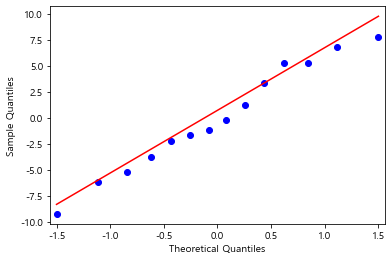

In [66]:
# 잔차의 정규성 검정
qqplot(reg_result.resid, line = 'q')

from statsmodels.stats.stattools import omni_normtest
omni_normtest(reg_result.resid, axis =0)

In [68]:
# 더빈왓슨 통계량 - 잔차간의 독립성을 확인하는 통계량
from statsmodels.stats.stattools import durbin_watson

durbin_watson(reg_result.resid)

# 잔차가 독립한다. 잔차간의 상관관계가 없다. 

2.051099222402314

### p204

In [76]:
df_raw = pd.DataFrame({'Strength':[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5],
                       'Baking time':[0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]})

<AxesSubplot:xlabel='Strength', ylabel='Baking time'>

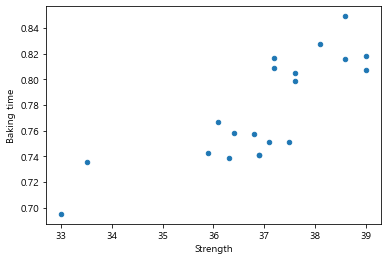

In [77]:
# 산점도 분석  (선형적 관계이다 Strength가 증가 함에 따라 Baking time도 증가한다.)
df_raw.plot.scatter(x = 'Strength', y = 'Baking time')